In [1]:
from src.constants import *
from steps.train_model import train_model
import matplotlib.pyplot as plt
import tensorflow as tf
from steps.ingest_data import ingestion
from steps.inference import inference

2025-06-09 07:46:39 | INFO | Loading settings from the ZenML secret store.
2025-06-09 07:46:41 | WARNING | Failed to load settings from the ZenML secret store. Defaulting to loading the settings from the '.env' file.


In [2]:
print(PROJECT_BASE_DIR)

C:\Users\souss\Desktop\DE\xaipneumonia


In [3]:
print(CONFIG_FILE_PATH)

C:\Users\souss\Desktop\DE\xaipneumonia\config\config.yaml


In [4]:
from src.utils.configuration import ConfigurationManager

In [5]:
config = ConfigurationManager()
data_config = config.get_data_ingestion_config()
print(data_config)

{'data_ingestion': {'data_source': 'data/chestxray', 'cache_dir': 'data/hf_cache'}, 'data_processing': {'batch_size': 16, 'normalize': True, 'augment': False, 'image_size': [256, 256], 'augmentation_config': {'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'rotation_range': 30, 'zoom_range': 0.2, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False}}}
2025-06-09 07:46:49 | INFO | yaml file: C:\Users\souss\Desktop\DE\xaipneumonia\config\config.yaml loaded successfully
2025-06-09 07:46:49 | INFO | created directory at: data/hf_cache
data_source='C:\\Users\\souss\\Desktop\\DE\\xaipneumonia\\data\\chestxray' cache_dir='C:\\Users\\souss\\Desktop\\DE\\xaipneumonia\\data\\hf_cache'


In [6]:
print(type(data_config.data_source), type(data_config.cache_dir))

<class 'str'> <class 'str'>


In [7]:
from pipelines.data_pipeline import data_pipeline

In [8]:
data_preprocess_config = config.get_data_preprocess_config()
data_preprocess_config

DataPreprocessingConfig(normalize=True, augment=False, batch_size=16, image_size=[256, 256], augmentation_config=DataAugmentationConfig(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=30, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False))

In [9]:
data_inngestion_config = config.get_data_ingestion_config()
data_inngestion_config

2025-06-09 07:46:49 | INFO | created directory at: data/hf_cache


DataIngestionConfig(data_source='C:\\Users\\souss\\Desktop\\DE\\xaipneumonia\\data\\chestxray', cache_dir='C:\\Users\\souss\\Desktop\\DE\\xaipneumonia\\data\\hf_cache')

In [10]:
train_dir, val_dir, test_dir = ingestion(data_inngestion_config)

2025-06-09 07:46:49 | INFO | Data ingested successfully
2025-06-09 07:46:49 | INFO | Data ingested successfully
2025-06-09 07:46:49 | INFO | Train directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\train
2025-06-09 07:46:49 | INFO | Validation directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\val
2025-06-09 07:46:49 | INFO | Test directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\test


In [11]:
data_preprocess_config

DataPreprocessingConfig(normalize=True, augment=False, batch_size=16, image_size=[256, 256], augmentation_config=DataAugmentationConfig(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=30, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False))

In [ ]:
model, history, index_to_class = train_model(train_dir, test_dir, data_preprocess_config)
print("Model summary: ", model.summary())

In [12]:
index_to_class = {0: 'NORMAL', 1: 'PNEUMONIA'}

In [13]:
model = tf.keras.models.load_model("my_model_2.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,912,069 (56.89 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 131,588 (514.02 KB)

In [14]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [15]:
test_image_path = r"C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\test\PNEUMONIA\person1_virus_7.jpeg"

In [16]:
img = tf.keras.utils.load_img(test_image_path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


In [17]:
predictions

array([[1.]], dtype=float32)

In [18]:
index_to_class[predictions[0][0]]

'PNEUMONIA'

In [23]:
_, pred = inference(model, test_image_path)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


array([[0.99673414]], dtype=float32)

In [24]:
index_to_class[predictions[0][0] > 0.5]

'PNEUMONIA'

In [26]:
from steps.gradcam_explanation import GradCAMExplainer

In [27]:


layer_name = "block5_conv3"
gradcam = GradCAMExplainer(model, layer_name)

model.get_layer(layer_name).output


<KerasTensor shape=(None, 16, 16, 512), dtype=float32, sparse=False, ragged=False, name=keras_tensor_33>

In [28]:
input_name = model.input.name.split(":")[0]
input_name

'input_image'

In [29]:
explanation = gradcam.explain(test_image_path)

In [30]:
explanation

{'original_image': array([[[181, 181, 181],
         [161, 161, 161],
         [130, 130, 130],
         ...,
         [214, 214, 214],
         [212, 212, 212],
         [218, 218, 218]],
 
        [[189, 189, 189],
         [155, 155, 155],
         [117, 117, 117],
         ...,
         [206, 206, 206],
         [210, 210, 210],
         [219, 219, 219]],
 
        [[185, 185, 185],
         [147, 147, 147],
         [ 97,  97,  97],
         ...,
         [212, 212, 212],
         [215, 215, 215],
         [223, 223, 223]],
 
        ...,
 
        [[ 26,  26,  26],
         [ 26,  26,  26],
         [ 26,  26,  26],
         ...,
         [ 19,  19,  19],
         [ 19,  19,  19],
         [ 19,  19,  19]],
 
        [[ 26,  26,  26],
         [ 26,  26,  26],
         [ 26,  26,  26],
         ...,
         [ 19,  19,  19],
         [ 19,  19,  19],
         [ 19,  19,  19]],
 
        [[ 26,  26,  26],
         [ 26,  26,  26],
         [ 26,  26,  26],
         ...,
         [

In [31]:
from IPython.display import Image, display

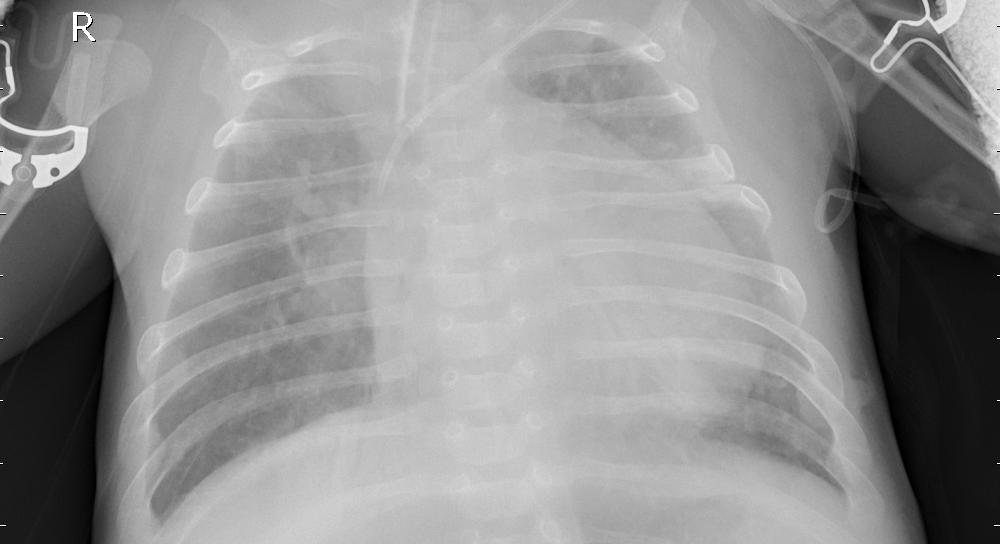

In [32]:
display(Image(filename=test_image_path))


(np.float64(-0.5), np.float64(15.5), np.float64(15.5), np.float64(-0.5))

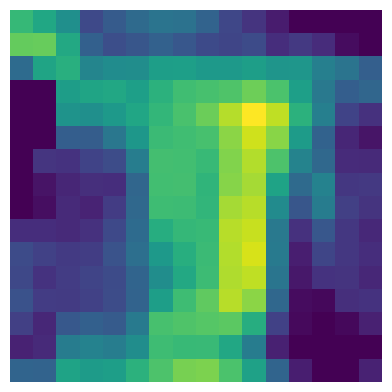

In [33]:
explanation["heatmap"].shape
plt.matshow(explanation["heatmap"])

plt.axis('off')

In [34]:
explanation["pred_score"]

array([[0.9967272]], dtype=float32)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

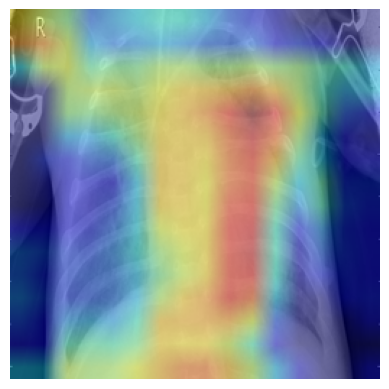

In [35]:
plt.imshow(explanation["superimposed_image"])
plt.axis('off')